<a href="https://colab.research.google.com/github/vedanttule134/Retail-Sales-Prediction/blob/main/Retail_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Retail Sales Prediction**



##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 -** Vedant Tule
##### **Team Member 2 -** Lovpreet Singh
##### **Team Member 3 -** Mariyam Mujawar
##### **Team Member 4 -** Sahil Diwan
##### **Team Member 5 -** Simran Singh

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.
You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from math import sqrt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Lasso
import statsmodels.api as sm

### Dataset Loading

In [ ]:
# Load Dataset
RossmannStoreData='https://drive.google.com/file/d/14a-zbltgirbuWh8tGvwfm7Xoo5pAINtV/view?usp=share_link'
RossmannStoreData='https://drive.google.com/uc?id=' + RossmannStoreData.split('/')[-2]
RSD = pd.read_csv(RossmannStoreData)

In [ ]:
# Load Dataset
store='https://drive.google.com/file/d/1MJ8i78_IDHDYec3s2xdbI9lkAvcyPczv/view?usp=share_link'
store='https://drive.google.com/uc?id=' + store.split('/')[-2]
store = pd.read_csv(store)

### Dataset First View

In [ ]:
# Dataset First Look
RSD.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
# Dataset First Look
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
RSD.shape

(1017209, 9)

In [ ]:
# Dataset Rows & Columns count
store.shape

(1115, 10)

### Dataset Information

In [ ]:
# Dataset Info
RSD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
# Dataset Info
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(RSD[RSD.duplicated()])

0

In [ ]:
# Dataset Duplicate Value Count
len(store[store.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
RSD.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
# Missing Values/Null Values Count
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

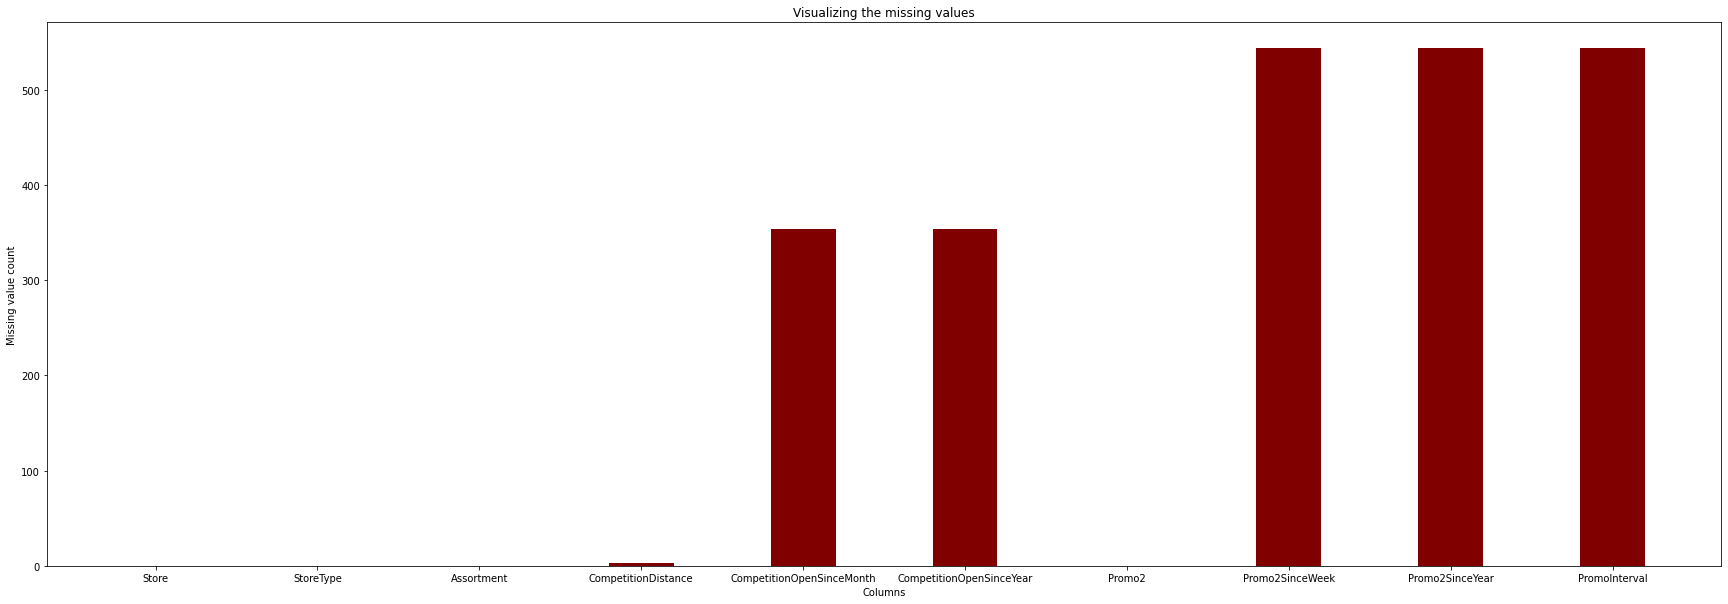

In [ ]:
# Visualizing the missing values 
courses = list(store.columns)
values = list(store.isnull().sum())
fig = plt.figure(figsize = (30, 10))
plt.bar(courses, values, color ='maroon',
        width = 0.4)
plt.xlabel("Columns")
plt.ylabel("Missing value count")
plt.title("Visualizing the missing values")
plt.show()

### What did you know about your dataset?

The **Rossmann Store Data** csv file has 1017209 rows and 9 columns. None of the variable in the dataset has missing/null values and most of the data is numerical type. The **store** data csv file has 1115 rows and 10 columns. Columns like CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, Promo2SinceYear and PromoInterval has several missing values which we plotted in the above bar graph.             

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
RSD.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [ ]:
# Dataset Columns
store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
# Dataset Describe
RSD.describe(include = 'all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


In [ ]:
# Dataset Describe
store.describe(include = 'all')

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,571
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,335
mean,558.00000,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,NaN,NaN,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,NaN,NaN,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,NaN,NaN,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN


### Variables Description 

**Data Description**

1. **Id** - an Id that represents a (Store, Date) duple within the test set
2. **Store** - a unique Id for each store
3. **Sales** - the turnover for any given day (this is what you are predicting)
4. **Customers** - the number of customers on a given day
5. **Open** - an indicator for whether the store was open: 0 = closed, 1 = open
6. **StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
7. **SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools
8. **StoreType** - differentiates between 4 different store models: a, b, c, d
9. **Assortment** - describes an assortment level: a = basic, b = extra, c = extended
10. **CompetitionDistance** - distance in meters to the nearest competitor store
CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
11. **Promo** - indicates whether a store is running a promo on that day
12. **Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
13. **Promo2Since**[Year/Week] - describes the year and calendar week when the store started participating in Promo2
14. **PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Filling all null values with 0
store.fillna({'CompetitionOpenSinceMonth':0},inplace=True)
store.fillna({'CompetitionOpenSinceYear':0},inplace=True)
store.fillna({'Promo2SinceWeek':0},inplace=True)
store.fillna({'Promo2SinceYear':0},inplace=True)
store.fillna({'PromoInterval':0},inplace=True)

In [ ]:
# Dropping unnecessary columns
store.drop(columns=['PromoInterval'],axis=1,inplace=True)

In [ ]:
# Removing duplicates if any
RSD.duplicated().sum()
RSD.drop_duplicates(inplace=True)

store.duplicated().sum()
store.drop_duplicates(inplace=True)

In [ ]:
# Create dummy variables for the catgeorical variable State
RSD['a'] = np.where(RSD['StateHoliday']=='a', 1, 0)
RSD['b'] = np.where(RSD['StateHoliday']=='b', 1, 0)
RSD['c'] = np.where(RSD['StateHoliday']=='c', 1, 0)

# Drop the original column State from the dataframe
RSD.drop(columns=['StateHoliday'],axis=1,inplace=True)

In [ ]:
RSD = RSD.rename(columns={'a':"public holiday",'b':"Easter holiday", 'c':"Christmas holiday"})

In [ ]:
# Final Rossmann Store Data set
RSD

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,public holiday,Easter holiday,Christmas holiday
0,1,5,2015-07-31,5263,555,1,1,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,1,0,0,0
2,3,5,2015-07-31,8314,821,1,1,1,0,0,0
3,4,5,2015-07-31,13995,1498,1,1,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,1,1,0,0
1017205,1112,2,2013-01-01,0,0,0,0,1,1,0,0
1017206,1113,2,2013-01-01,0,0,0,0,1,1,0,0
1017207,1114,2,2013-01-01,0,0,0,0,1,1,0,0


In [ ]:
# Final store data set
store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0
1112,1113,a,c,9260.0,0.0,0.0,0,0.0,0.0
1113,1114,a,c,870.0,0.0,0.0,0,0.0,0.0


### What all manipulations have you done and insights you found?

We filled all the missing values with zero and dropped the duplicates if any. StateHoliday column has categorical data so we changed it to numerical data.
We dropped a columns "PromoInterval" from the data set and now after few manipulations our data sets are ready for EDA.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## ***EDA ON ROSSMANN STORE DATASET***

#### Chart - 1 - Sweet Viz

In [ ]:
# Chart - 1 visualization code
!pip install sweetviz
import sweetviz as sv
sweet_report = sv.analyze(RSD)
sweet_report.show_html('sweet_report_RSD.html')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 58.5 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)

Report sweet_report_RSD.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


##### 1. Why did you pick the specific chart?

Sweetviz is an open-source Python library that generates beautiful, high-density visualizations to kickstart EDA (Exploratory Data Analysis) with just two lines of code. Output is a fully self-contained HTML application.
The system is built around quickly visualizing target values and comparing datasets. Its goal is to help quick analysis of target characteristics, training vs testing data, and other such data characterization tasks.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2 - Barplot 

<AxesSubplot:title={'center':'Impact of promo on sales'}, xlabel='Promo', ylabel='Sales'>

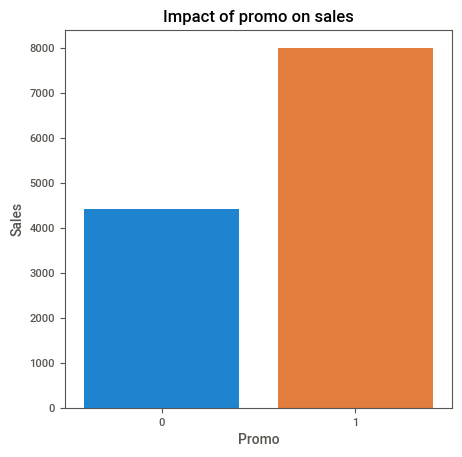

In [ ]:
# Chart - 4 visualization code
#Impact of promo on sales
plt.figure(figsize=(5,5))
plt.title("Impact of promo on sales")
Promo_sales = pd.DataFrame(RSD.groupby('Promo').agg({'Sales':'mean'}))
sns.barplot(x=Promo_sales.index, y = Promo_sales['Sales'])

##### 1. Why did you pick the specific chart?

Bar graph summarises the large set of data in simple visual form.
It displays each category of data in the frequency distribution.
It clarifies the trend of data better than the table.
It helps in estimating the key values at a glance.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3 - Barplot

In [ ]:
# Chart - 5 visualization code
numeric_features = RSD.describe().columns
numeric_features

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'public holiday', 'Easter holiday',
       'Christmas holiday'],
      dtype='object')

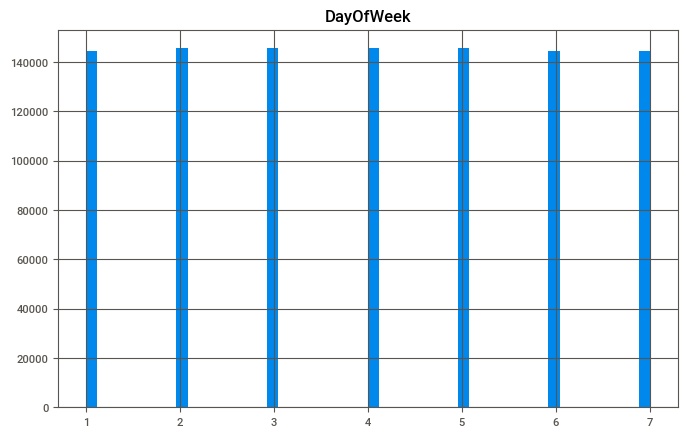

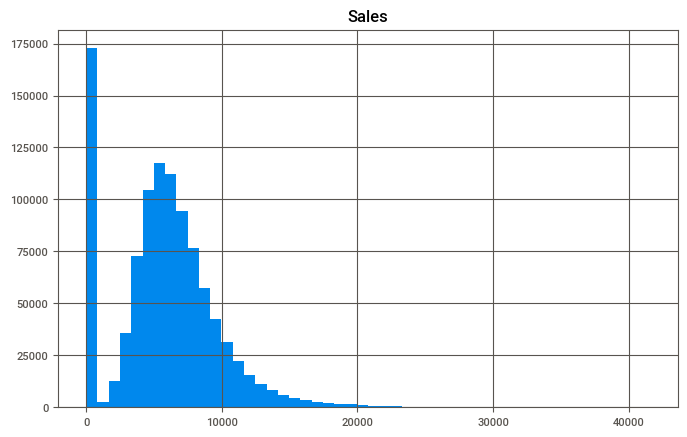

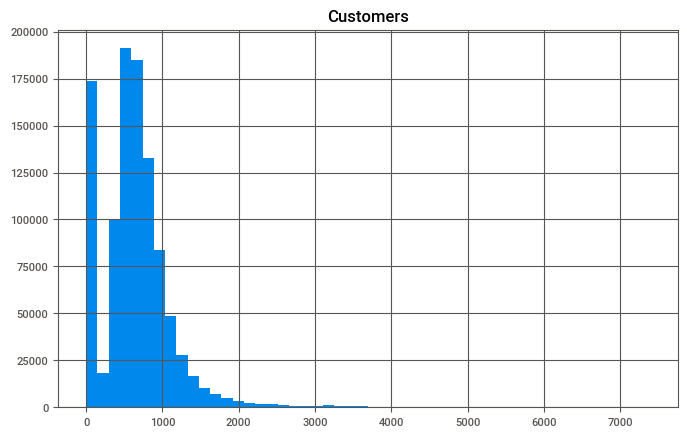

In [ ]:
for col in numeric_features[1:4]:
    fig = plt.figure(figsize=(8, 5))
    ax = fig.gca()
    feature = RSD[col]
    feature.hist(bins=50, ax = ax)    
    ax.set_title(col)
plt.show()

##### 1. Why did you pick the specific chart?

Bar graph summarises the large set of data in simple visual form.
It displays each category of data in the frequency distribution.
It clarifies the trend of data better than the table.
It helps in estimating the key values at a glance.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4 - Pie Chart

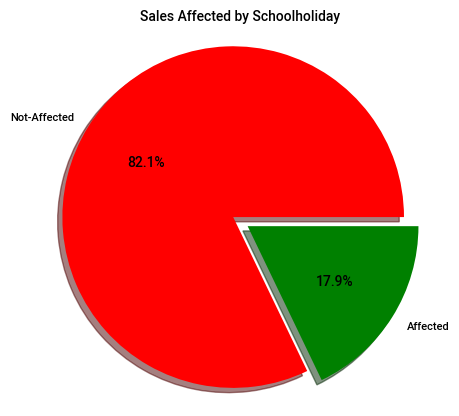

In [ ]:
# Chart - 6 visualization code
# Sales affected by School Holiday
labels = 'Not-Affected' , 'Affected'
sizes = RSD.SchoolHoliday.value_counts()
colors = ['red', 'green']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=360)
plt.axis('equal')
plt.title("Sales Affected by Schoolholiday",fontsize=10)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.show()

##### 1. Why did you pick the specific chart?

It displays relative proportions of multiple classes of data.
The size of the circle can be made proportional to the total quantity it represents.It summarize a large data set in visual form.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5 - Pair Plot

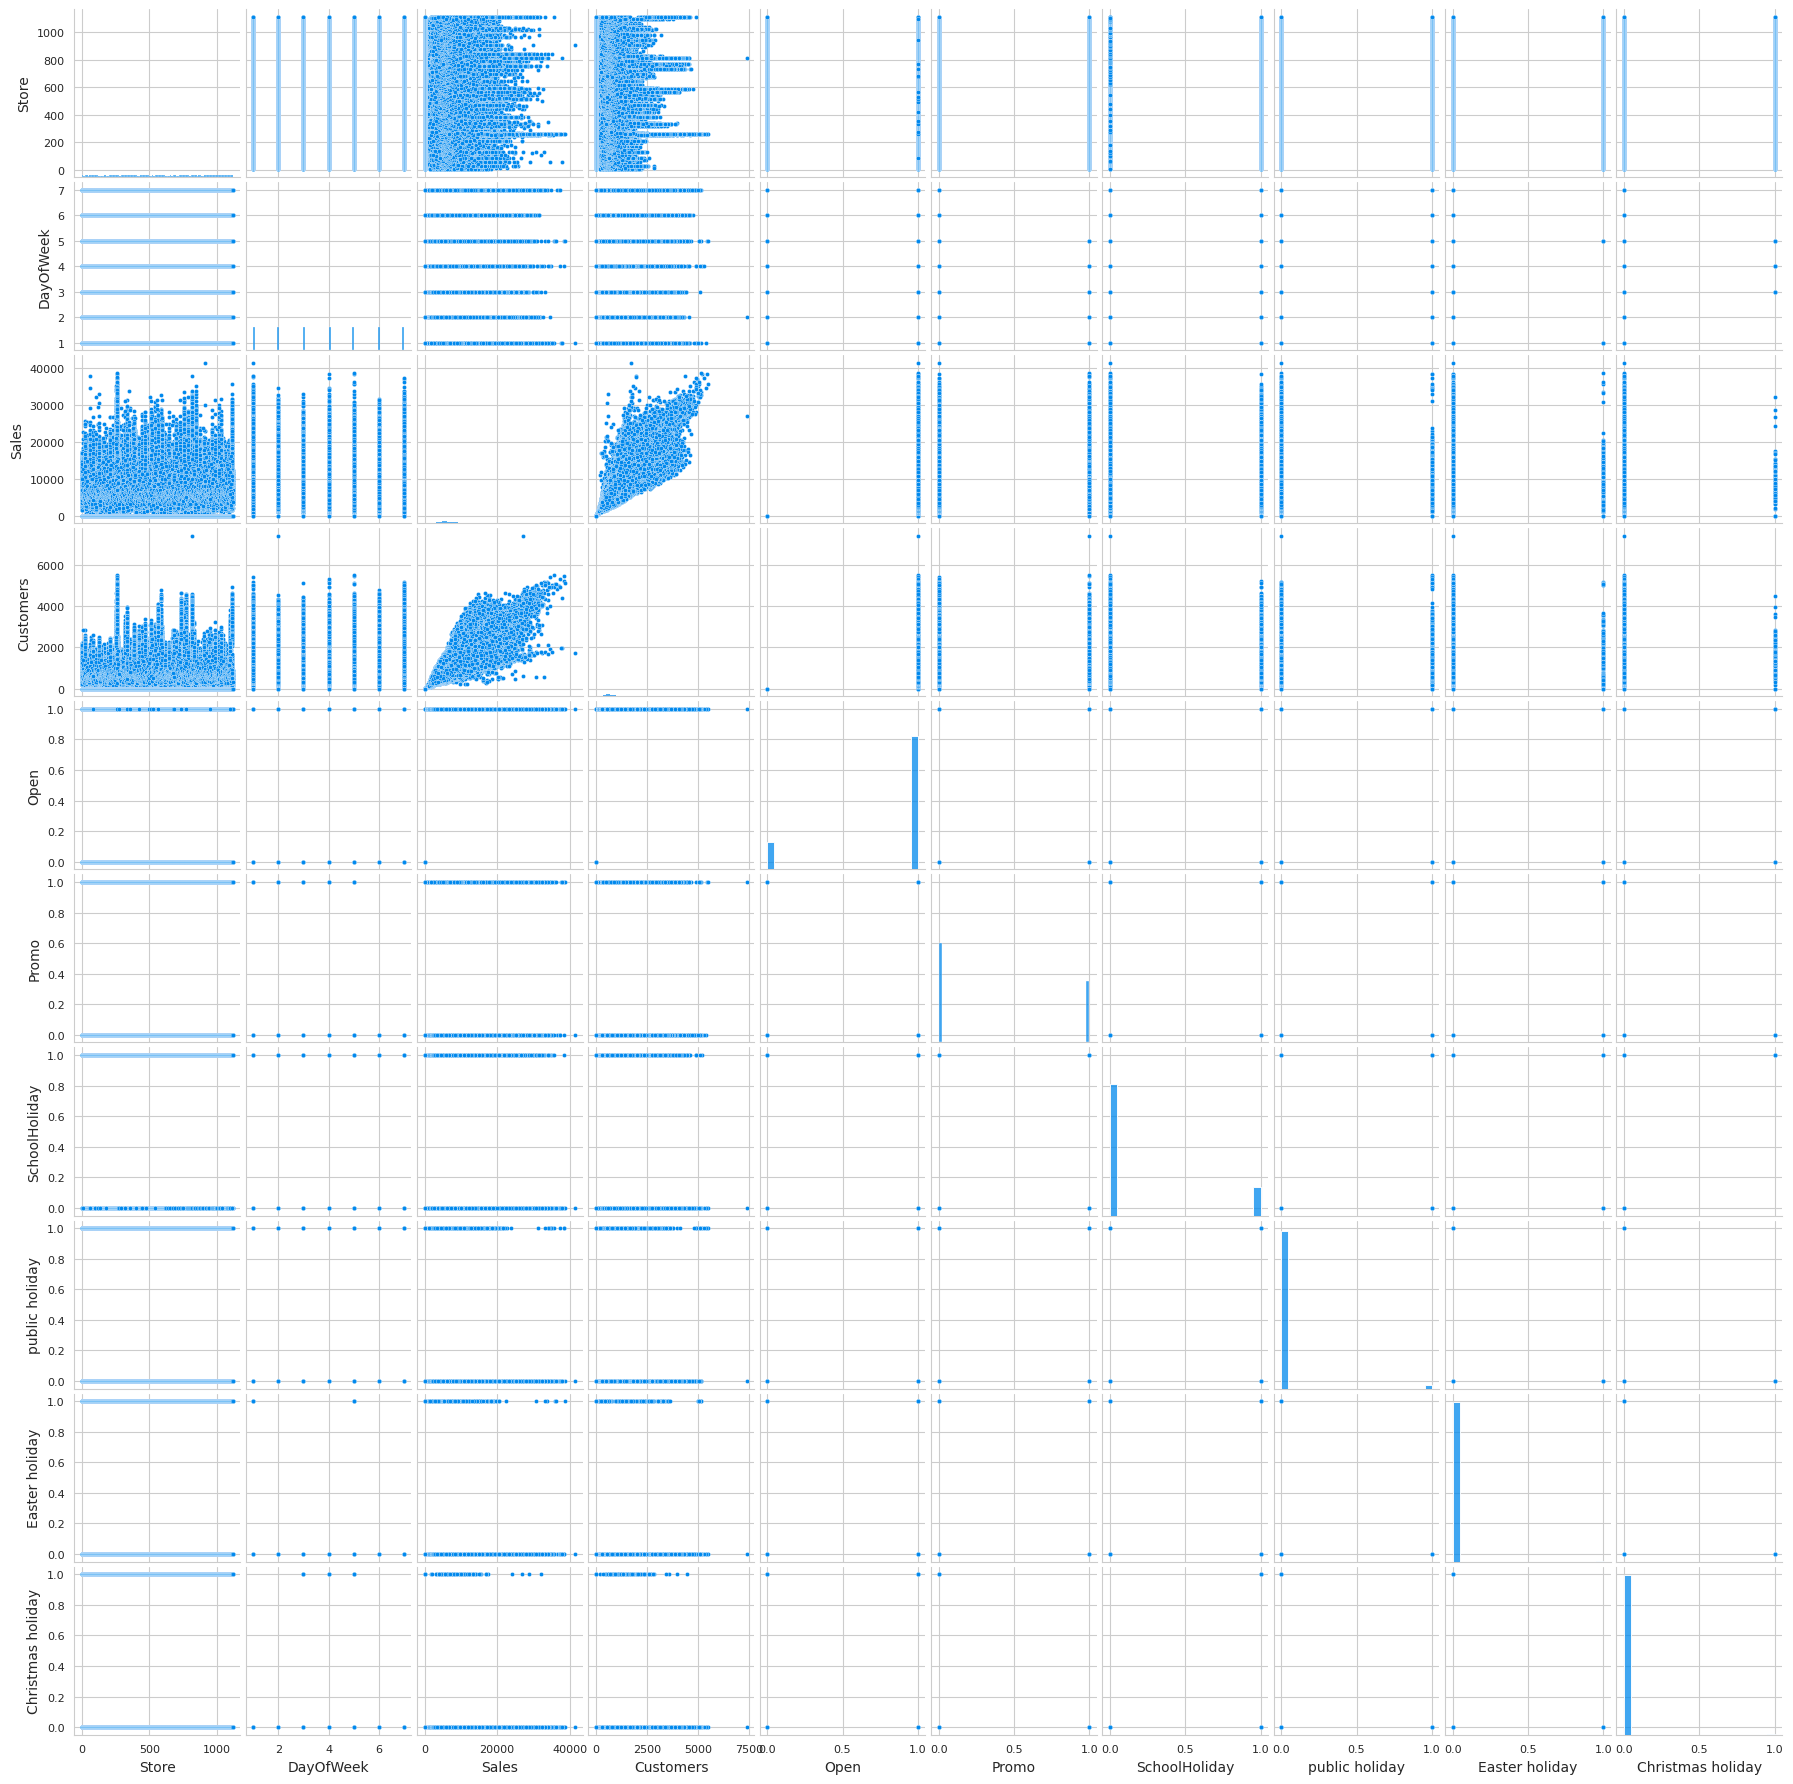

In [ ]:
# Chart - 9 visualization code
#pairplot for Rossmann store dataset
sns.set_style("whitegrid", {'axes.grid' : True})
pp=sns.pairplot(RSD,hue=None)
pp.fig.set_size_inches(18,18);

##### 1. Why did you pick the specific chart?

The Seaborn Pairplot allows us to plot pairwise relationships between variables within a dataset. This creates a nice visualisation and helps us understand the data by summarising a large amount of data in a single figure. This is essential when we are exploring our dataset and trying to become familiar with it.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6 - Correlation Heatmap 

<AxesSubplot:>

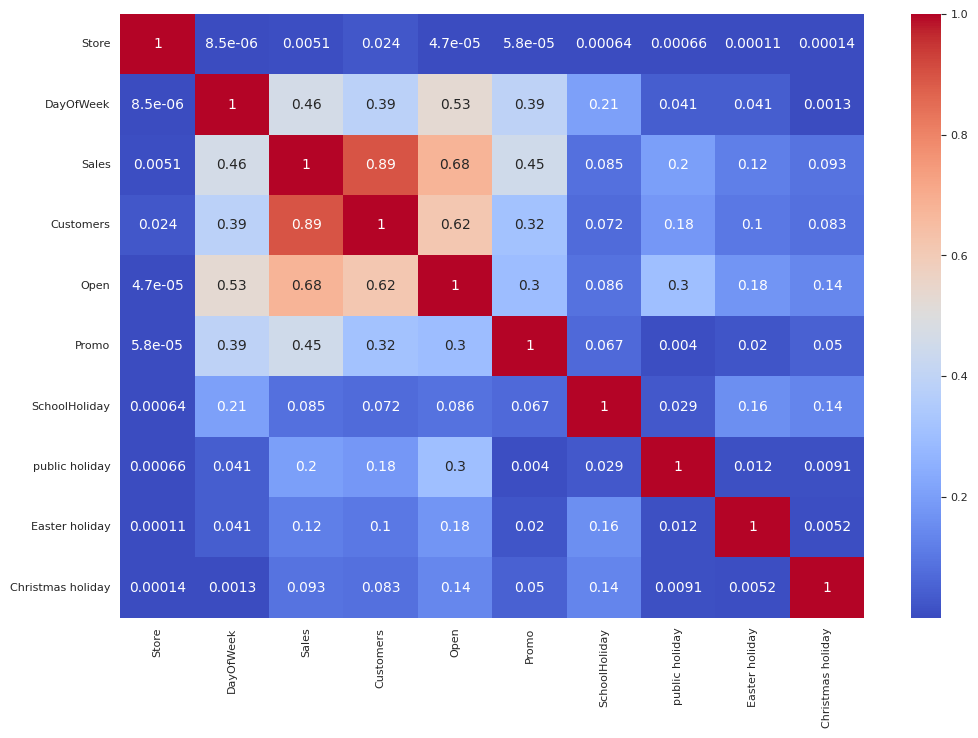

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(12,8))
correlation = RSD.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

Correlation heatmaps can be used to find potential relationships between variables and to understand the strength of these relationships. In addition, correlation plots can be used to identify outliers and to detect linear and nonlinear relationships.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***EDA ON STORE DATASET***

#### Chart - 7 - Sweet Viz

In [ ]:
# Chart - 2 visualization code
!pip install sweetviz
import sweetviz as sv
sweet_report = sv.analyze(store)
sweet_report.show_html('sweet_report_store.html')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


                                             |          | [  0%]   00:00 -> (? left)

Report sweet_report_store.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


##### 1. Why did you pick the specific chart?

Sweetviz is an open-source Python library that generates beautiful, high-density visualizations to kickstart EDA (Exploratory Data Analysis) with just two lines of code. Output is a fully self-contained HTML application.
The system is built around quickly visualizing target values and comparing datasets. Its goal is to help quick analysis of target characteristics, training vs testing data, and other such data characterization tasks.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8 - Barplot

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


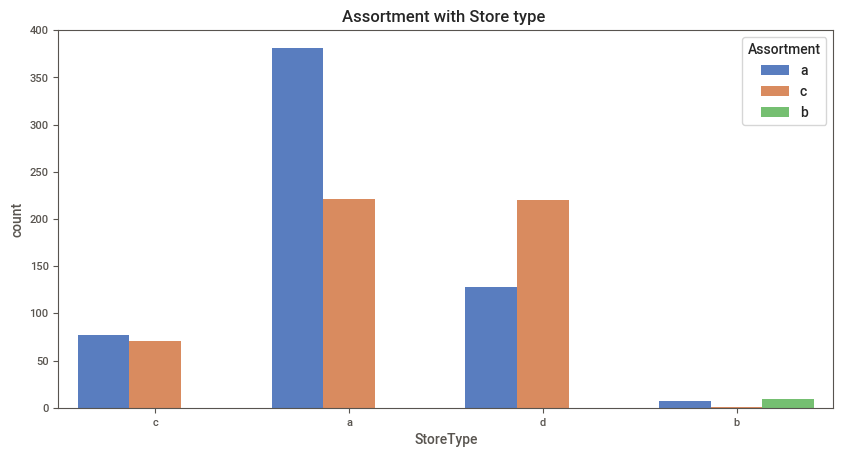

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(10,5))
plt.title("Assortment with Store type ")
sns.countplot(store.StoreType,hue=store.Assortment, palette="muted")
plt.show()

##### 1. Why did you pick the specific chart?

Bar graph summarises the large set of data in simple visual form.
It displays each category of data in the frequency distribution.
It clarifies the trend of data better than the table.
It helps in estimating the key values at a glance.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9 - Pie Chart

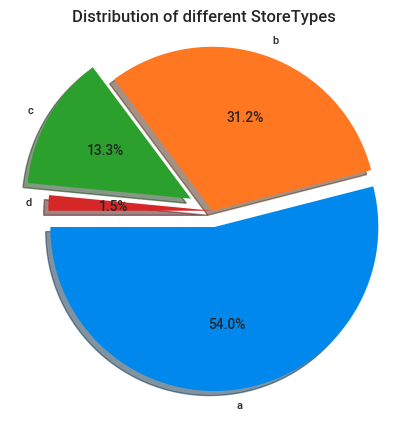

In [ ]:
# Chart - 7 visualization code
# Distribution Of Different Store Types
labels = 'a' , 'b' , 'c' , 'd'
sizes = store.StoreType.value_counts()
explode = (0.1, 0.0 , 0.15 , 0.0)
plt.pie(sizes, explode=explode, labels=labels, 
        autopct='%1.1f%%',shadow=True,  startangle=180)
plt.axis('equal')
plt.title("Distribution of different StoreTypes")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.show()

##### 1. Why did you pick the specific chart?

It displays relative proportions of multiple classes of data. The size of the circle can be made proportional to the total quantity it represents.It summarize a large data set in visual form.



##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10 - Pair Plot 

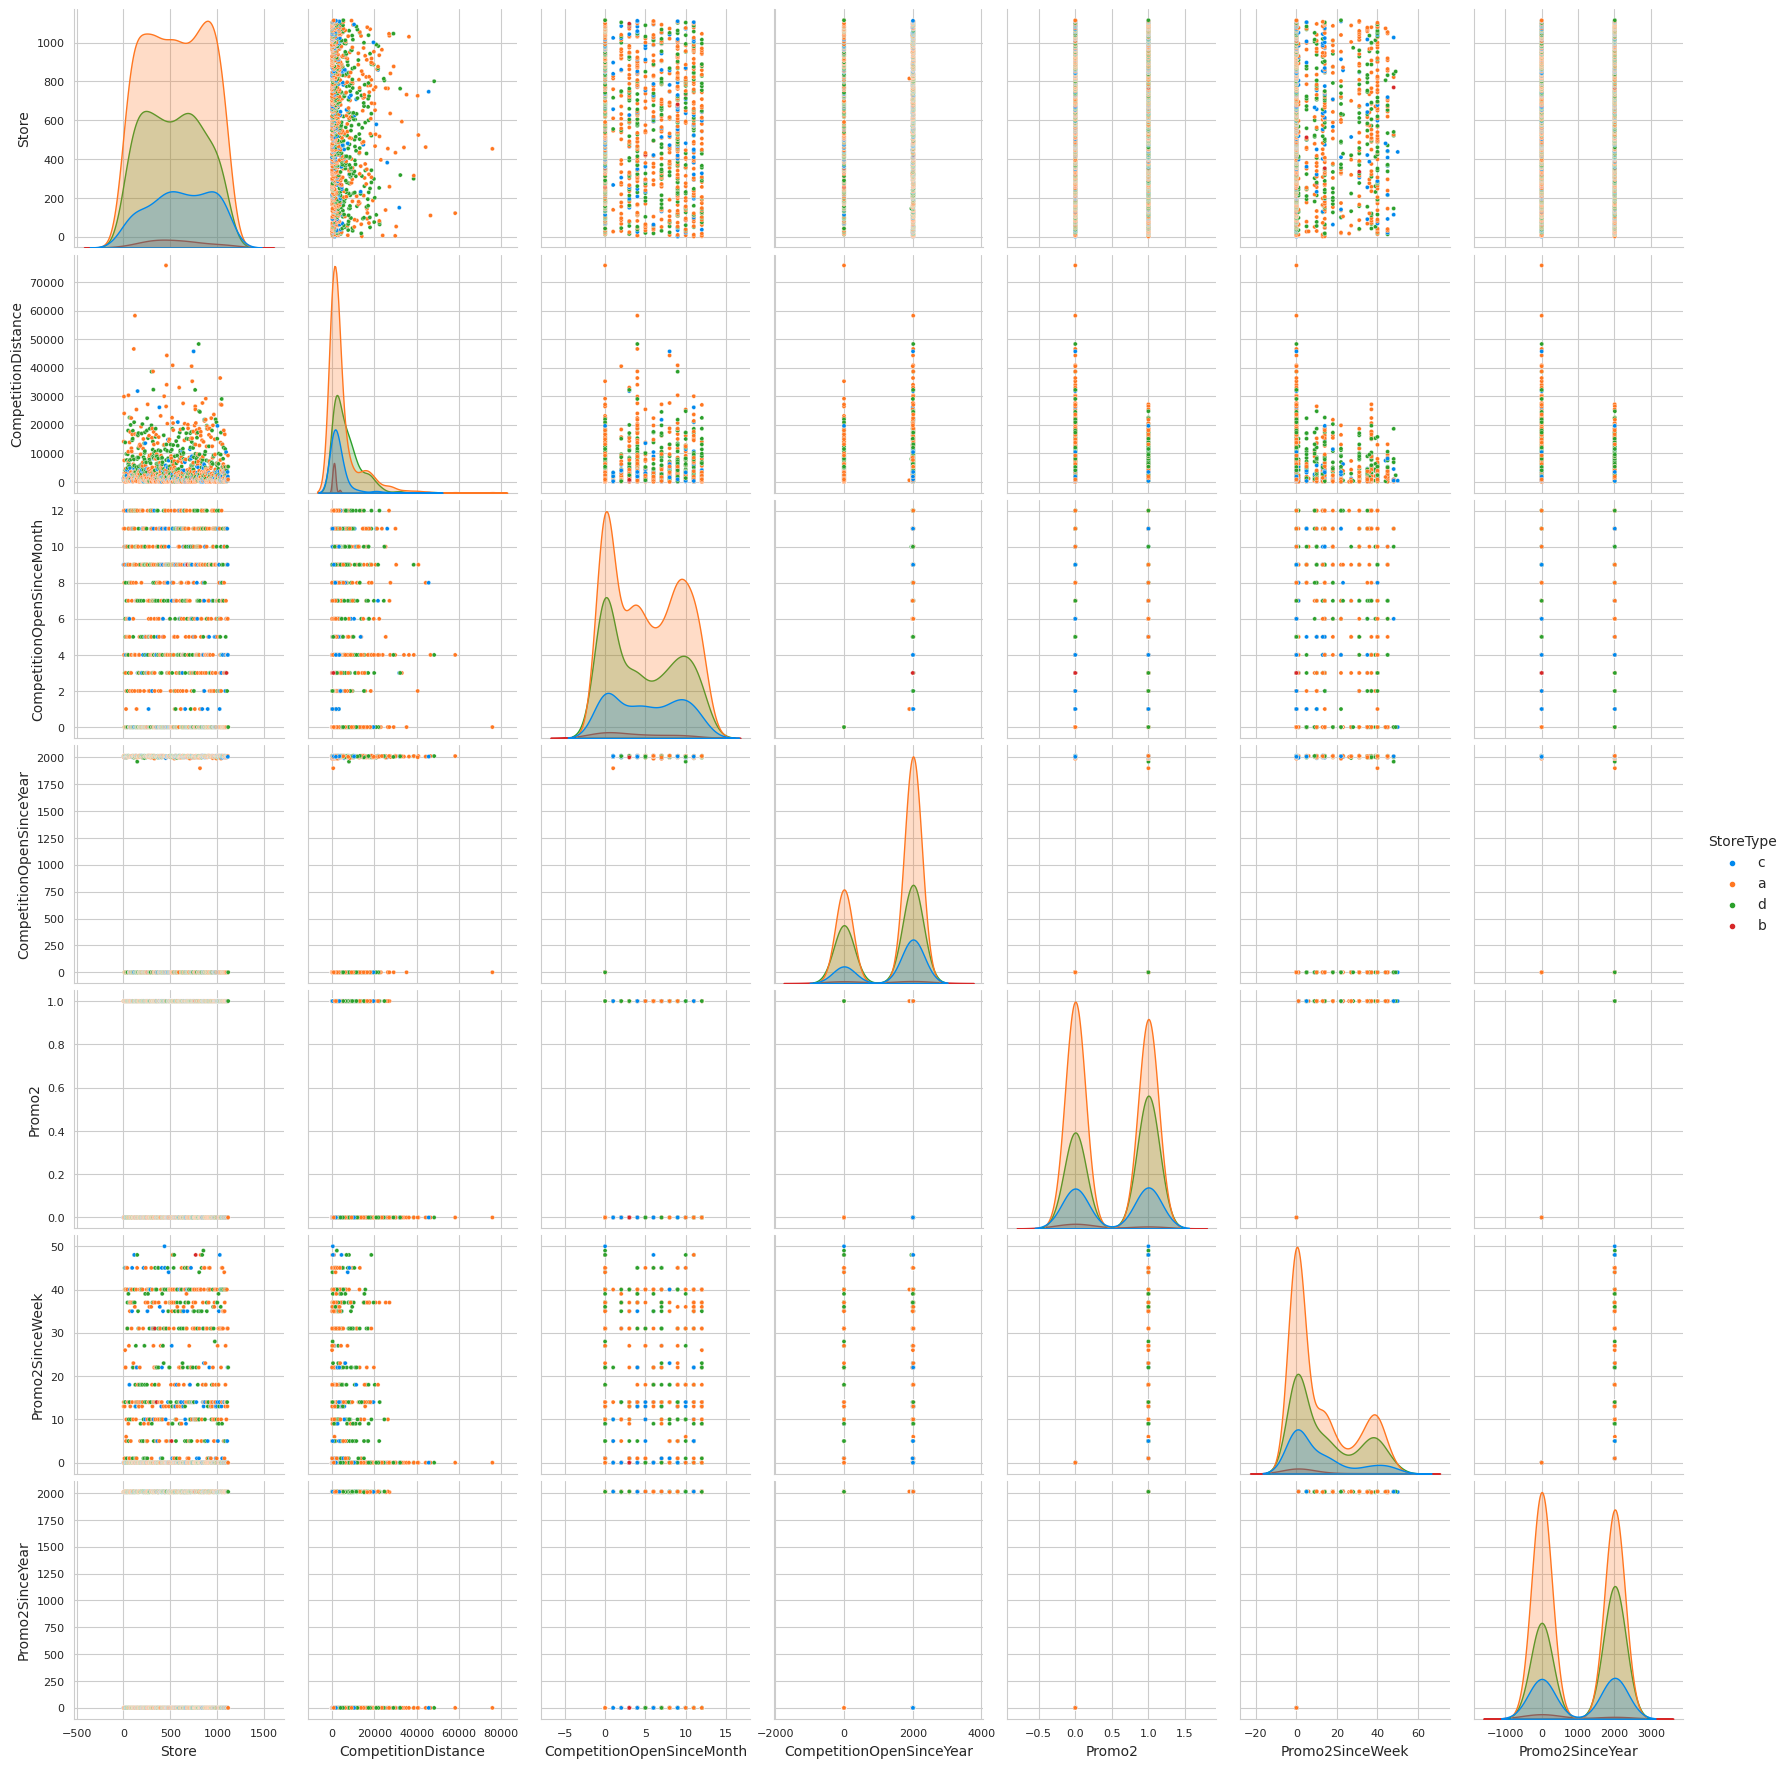

In [ ]:
# Chart - 8 visualization code
#pairplot for store dataset
sns.set_style("whitegrid", {'axes.grid' : True})
pp=sns.pairplot(store,hue='StoreType')
pp.fig.set_size_inches(18,18);

##### 1. Why did you pick the specific chart?

The Seaborn Pairplot allows us to plot pairwise relationships between variables within a dataset. This creates a nice visualisation and helps us understand the data by summarising a large amount of data in a single figure. This is essential when we are exploring our dataset and trying to become familiar with it.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11 - Boxplot

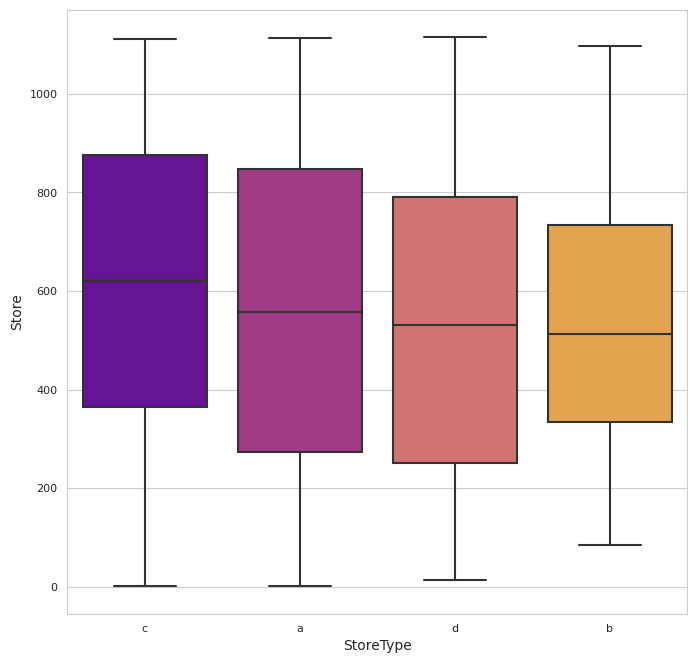

In [ ]:
# Chart - 12 visualization code
plt.figure(figsize=(8,8))
ax = sns.boxplot(data=store, y='Store',x='StoreType',palette='plasma')

##### 1. Why did you pick the specific chart?

Box plots are very effective and easy to read, as they can summarize data from multiple sources and display the results in a single graph. Box plots allow for comparison of data from different categories for easier, more effective decision-making.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12 - Correlation Heatmap

<AxesSubplot:>

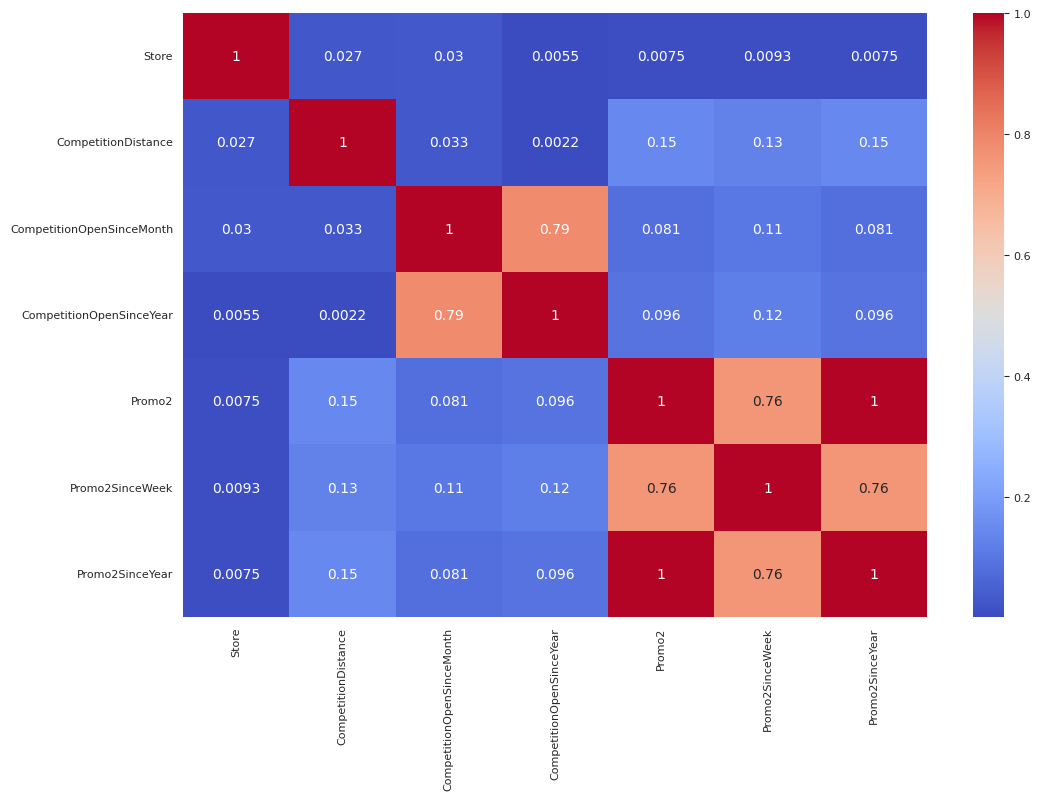

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(12,8))
correlation = store.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

Correlation heatmaps can be used to find potential relationships between variables and to understand the strength of these relationships. In addition, correlation plots can be used to identify outliers and to detect linear and nonlinear relationships.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Merging the two datasets***

### Merging two datasets is the process of bringing two datasets together into one, and aligning the rows from each based on common attributes or columns. We are provided with two datasets. We are now merging the two datastes for the further EDA and model implementation.

In [ ]:
Merged_df = RSD.merge(store, on = "Store")


###  Handling Missing Values

In [ ]:
# Missing Values/Null Values Count
Merged_df.isnull().sum()

Store                           0
DayOfWeek                       0
Date                            0
Sales                           0
Customers                       0
Open                            0
Promo                           0
SchoolHoliday                   0
public holiday                  0
Easter holiday                  0
Christmas holiday               0
StoreType                       0
Assortment                      0
CompetitionDistance          2642
CompetitionOpenSinceMonth       0
CompetitionOpenSinceYear        0
Promo2                          0
Promo2SinceWeek                 0
Promo2SinceYear                 0
dtype: int64

In [ ]:
# Filling all null values with 0
Merged_df.fillna({'CompetitionDistance':0},inplace=True)

In [ ]:
# Removing duplicates if any
Merged_df.duplicated().sum()
Merged_df.drop_duplicates(inplace=True)

In [ ]:
# Merged Dataset View
Merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,public holiday,Easter holiday,Christmas holiday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,1,5,2015-07-31,5263,555,1,1,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0
1,1,4,2015-07-30,5020,546,1,1,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0
2,1,3,2015-07-29,4782,523,1,1,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0
3,1,2,2015-07-28,5011,560,1,1,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0
4,1,1,2015-07-27,6102,612,1,1,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0


In [ ]:
# Dataset Rows & Columns count
Merged_df.shape

(1017209, 19)

## ***6. EDA on Merged Dataset***

### Chart 1: Correlation Heatmap of Merged dataset

<AxesSubplot:>

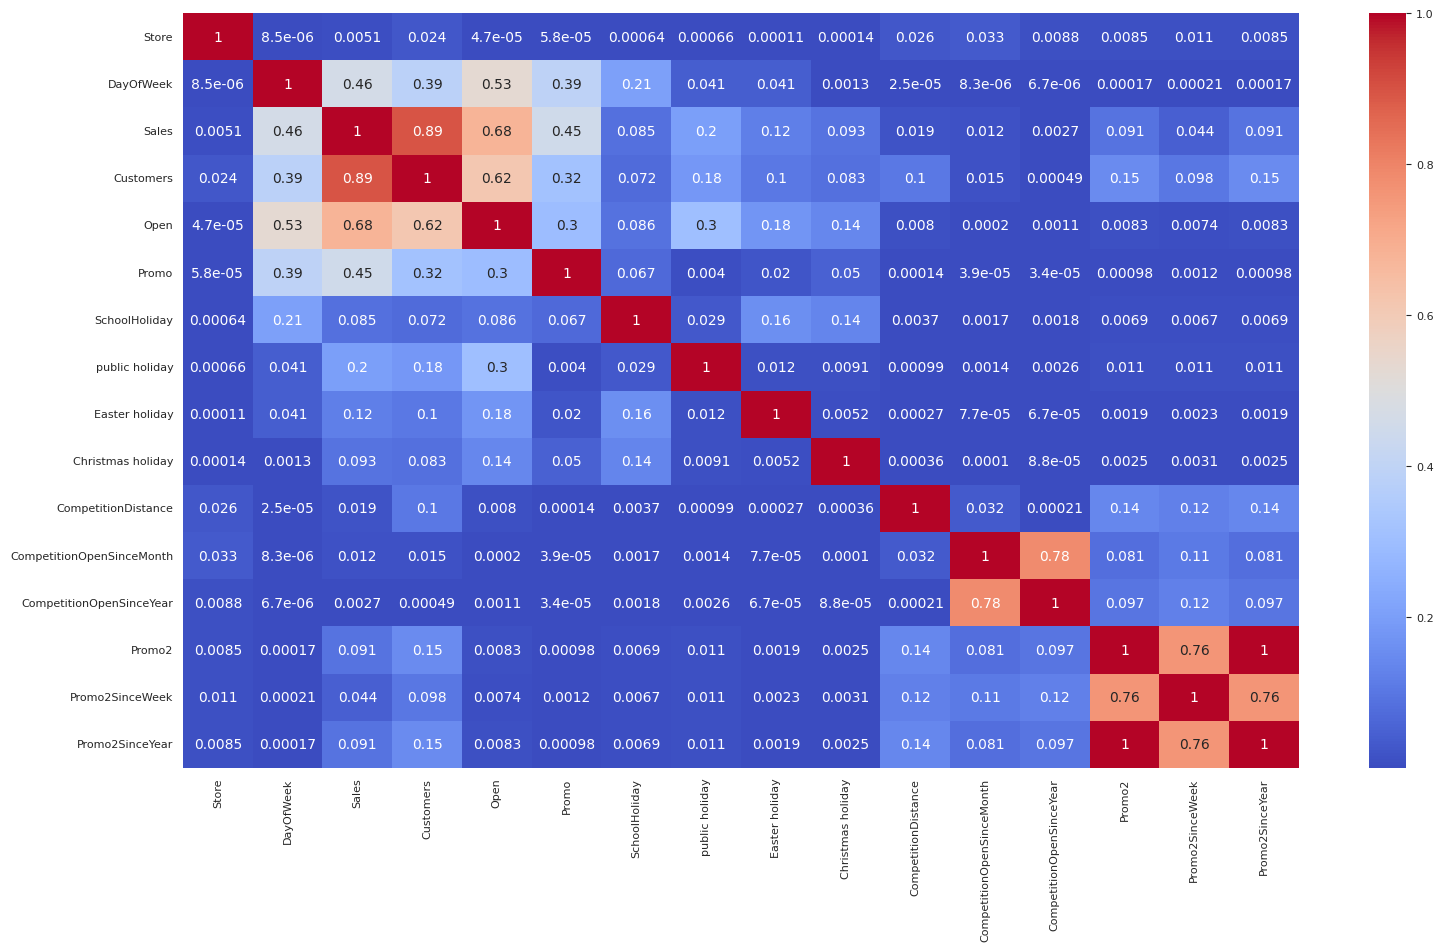

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(18,10))
correlation = Merged_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

Correlation heatmaps can be used to find potential relationships between variables and to understand the strength of these relationships. In addition, correlation plots can be used to identify outliers and to detect linear and nonlinear relationships.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

### Chart 2:

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

Answer Here

### Chart 3:

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

Answer Here

### Chart 4:

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

Answer Here

### Chart 5:

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [ ]:
# defining new variable after removing outliers
Merged_df= remove_outlier(Merged_df, 'Sales')

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
# Create dummy variables for the catgeorical variable State of StoreType
Merged_df['StoreType-a'] = np.where(Merged_df['StoreType']=='a', 1, 0)
Merged_df['StoreType-b'] = np.where(Merged_df['StoreType']=='b', 1, 0)
Merged_df['StoreType-c'] = np.where(Merged_df['StoreType']=='c', 1, 0)
Merged_df['StoreType-d'] = np.where(Merged_df['StoreType']=='d', 1, 0)

# Drop the original column State from the dataframe
Merged_df.drop(columns=['StoreType'],axis=1,inplace=True)

In [ ]:
# Create dummy variables for the catgeorical variable State of Assortment
Merged_df['Basic-Assortment'] = np.where(Merged_df['Assortment']=='a', 1, 0)
Merged_df['Extra-Assortment'] = np.where(Merged_df['Assortment']=='b', 1, 0)
Merged_df['Extended-Assortment'] = np.where(Merged_df['Assortment']=='c', 1, 0)

# Drop the original column State from the dataframe
Merged_df.drop(columns=['Assortment'],axis=1,inplace=True)

In [ ]:
Merged_df.shape

(990515, 24)

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Dropping unwanted columns 


In [ ]:
Merged_df.drop(columns=['Open','public holiday','Easter holiday','Christmas holiday','Date',],axis=1,inplace=True)
Merged_df.drop(columns=['CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear'],axis=1,inplace=True)

In [ ]:
Merged_df.head()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,CompetitionDistance,StoreType-a,StoreType-b,StoreType-c,StoreType-d,Basic-Assortment,Extra-Assortment,Extended-Assortment
0,1,5,5263,555,1,1,1270.0,0,0,1,0,1,0,0
1,1,4,5020,546,1,1,1270.0,0,0,1,0,1,0,0
2,1,3,4782,523,1,1,1270.0,0,0,1,0,1,0,0
3,1,2,5011,560,1,1,1270.0,0,0,1,0,1,0,0
4,1,1,6102,612,1,1,1270.0,0,0,1,0,1,0,0


In [ ]:
# Removed all the 0 values in sales as it may affect the model
Merged_df = Merged_df[Merged_df['Sales']>0]

In [ ]:
# Final Dataset For model implementation
Merged_df

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,CompetitionDistance,StoreType-a,StoreType-b,StoreType-c,StoreType-d,Basic-Assortment,Extra-Assortment,Extended-Assortment
0,1,5,5263,555,1,1,1270.0,0,0,1,0,1,0,0
1,1,4,5020,546,1,1,1270.0,0,0,1,0,1,0,0
2,1,3,4782,523,1,1,1270.0,0,0,1,0,1,0,0
3,1,2,5011,560,1,1,1270.0,0,0,1,0,1,0,0
4,1,1,6102,612,1,1,1270.0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017202,1115,1,6905,471,1,1,5350.0,0,0,0,1,0,0,1
1017204,1115,6,4771,339,0,1,5350.0,0,0,0,1,0,0,1
1017205,1115,5,4540,326,0,1,5350.0,0,0,0,1,0,0,1
1017206,1115,4,4297,300,0,1,5350.0,0,0,0,1,0,0,1


## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import math
from math import sqrt
from sklearn.metrics import mean_squared_error
X=Merged_df.drop('Sales',axis=1)
y=Merged_df['Sales']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
lr=LinearRegression()

# Fit the Algorithm
lr.fit(Xtrain,ytrain)
print("Training R2")
print(lr.score(Xtrain,ytrain))
print("Testing R2")
print(lr.score(Xtest,ytest))

# Predict on the model
predicted = lr.predict(Xtest)
print(lr.coef_)
print(lr.intercept_)

Training R2
0.7769941596187551
Testing R2
0.7782363779776902
[-1.08965369e-01 -2.25732591e+01  7.11708186e+00  1.09903576e+03
  4.81573717e+01  2.04761870e-02  3.23890127e+02 -1.94476053e+03
  1.87776677e+02  1.43309372e+03  1.36521377e+03 -3.02808583e+03
  1.66287206e+03]
-1065.11321828388


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
y_pred_train = lr.predict(Xtrain)
y_pred = lr.predict(Xtest)

In [ ]:
mean_squared_error(ytest, y_pred)

1352090.8595158178

In [ ]:
math.sqrt(mean_squared_error(ytest, y_pred))

1162.794418423058

In [ ]:
Train_Score_1 = lr.score(Xtrain,ytrain)
Train_Score_1

0.7769941596187551

In [ ]:
Test_Score_1=lr.score(Xtest,ytest)
Test_Score_1

0.7782363779776902

In [ ]:
#storing 200 observations for analysis
simple_lr_pred = y_pred[:200]
simple_lr_real = ytest[:200]

#storing these values into dataframe
dataset_lr = pd.DataFrame({'Real':simple_lr_real,'PredictedLR':simple_lr_pred})

In [ ]:
#storing absolute diffrences between actual sales price and predicted
dataset_lr['diff']=(dataset_lr['Real']-dataset_lr['PredictedLR']).abs()

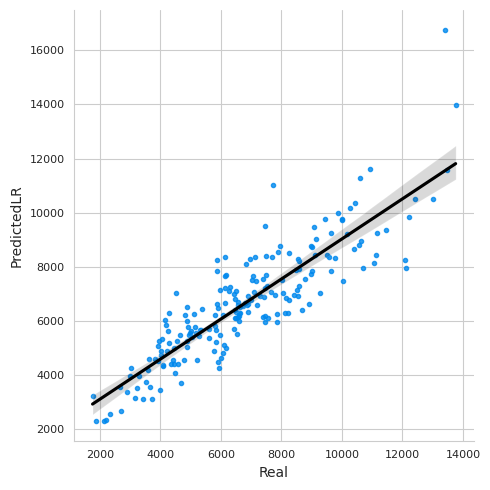

In [ ]:
#visualising our predictions
sns.lmplot(x='Real', y='PredictedLR', data=dataset_lr, line_kws={'color': 'black'});

#### 2. Cross- Validation & Hyperparameter Tuning
Ordinary Least Square Method 

In [ ]:
# let's add an intercept (beta_0) to our model
import statsmodels.api as sm
X = sm.add_constant(X)

# sm.OLS(output, input)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                 2.594e+05
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        13:07:44   Log-Likelihood:            -6.9331e+06
No. Observations:              817644   AIC:                         1.387e+07
Df Residuals:                  817632   BIC:                         1.387e+07
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -684.7200      5.212   -131.378      0.000    -694.935    -674.505
Store                  -0.1086      0.004    -27.128      0.000      -0.116      -0.101
DayOfWeek             -22.8408      0.792    -28.849      0.000     -24.393     -21.289
Customers               7.1216      0.005   1470.611      0.000       7.112       7.131
Promo                1099.3009      2.761    398.144      0.000    1093.889    1104.712
SchoolHoliday          49.4066      3.300     14.973      0.000      42.939      55.874
CompetitionDistance     0.0203      0.000    119.962      0.000       0.020       0.021
StoreType-a           150.6343      4.786     31.475      0.000     141.254     160.014
StoreType-b         -2111.9973     12.833   -164.577      0.000   -2137.149   -2086.845
StoreType-c            15.1171      5.339      2.831      0.005       4.653      25.581
StoreType-d          1261.5259      5.012    251.696      0.000    1251.702    1271.349
Basic-Assortment     1156.0036      6.480    178.385      0.000    1143.302    1168.705
Extra-Assortment    -3294.4131     15.451   -213.215      0.000   -3324.697   -3264.129
Extended-Assortment  1453.6896      6.668    217.995      0.000    1440.620    1466.759
==============================================================================
Omnibus:                    49468.674   Durbin-Watson:                   0.378
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           125368.353
Skew:                           0.358   Prob(JB):                         0.00
Kurtosis:                       4.780   Cond. No.                     7.47e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.34e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

##### Which hyperparameter optimization technique have you used and why?

We used ordinary least square method optimization technique beacuse the aim of the ordinary least squares method is to minimize the prediction error, between the predicted and real values. We choose to minimize the sum of squared errors instead of the sum of errors directly. It takes into account the sum of squared errors instead of the errors as they are because sometimes they can be negative or positive and they could sum up to a nearly null value.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

In [ ]:
# ML Model - 2 Implementation
#With Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
X=Merged_df.drop('Sales',axis=1)
y=Merged_df['Sales']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
pipe = Pipeline((
("sc",StandardScaler()),
("lr", GradientBoostingRegressor()),
))

# Fit the Algorithm
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))

# Predict on the model
predicted = pipe.predict(Xtest)
print(pipe.coef_)
print(pipe.intercept_)

Training R2
0.8439753394628778
Testing R2
0.8446190432105517


AttributeError: ignored

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
y_pred_train = pipe.predict(Xtrain)
y_pred = pipe.predict(Xtest)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***